# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
value_count = combined_data['Mouse ID'].value_counts()
len_of_data = len(value_count)
len_of_data


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_data = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_data

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_data)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_value_count = clean_data['Mouse ID'].value_counts()
clean_len_of_data = len(clean_value_count)
clean_len_of_data

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
variance = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std_dev = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_table_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median,
                                 'Variance in Tumor Volume': variance, 'Std. Dev. in Tumor Volume': std_dev,
                                 'SEM of Tumor Volume': sem})

summary_table_df

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Std. Dev. in Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_summary_df = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].aggregate(['mean', 'median', 'var', 'std', 'sem'])
aggregation_summary_df
#Used the website in the ReadME file to help make this section of code

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
mice_per_drug = clean_data["Drug Regimen"].value_counts()
mice_per_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

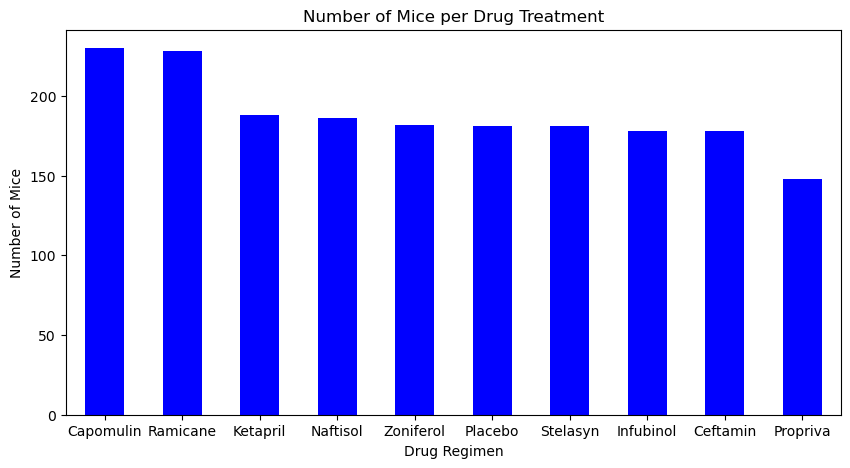

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
panda_plot = mice_per_drug.plot(kind = 'bar', color = 'blue', figsize= (10,5), align = 'center', rot= 0)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Treatment')

plt.show()

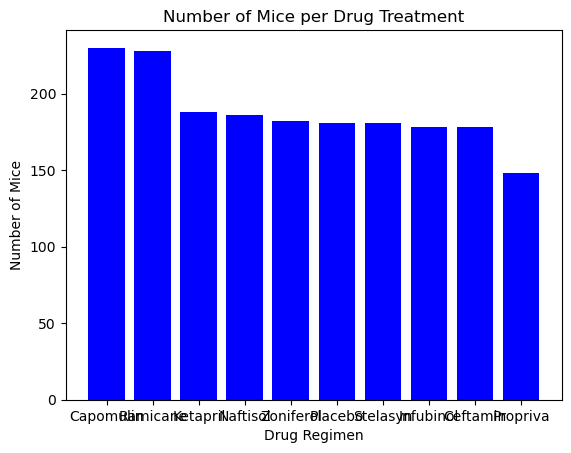

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_per_drug.index.values
y_axis = mice_per_drug.values

#x_axis = np.arange(len(drug_table['Drug Regimen']))

#mice_per_drug = clean_data["Drug Regimen"].value_counts
#y_axis = mice_per_drug["Mouse ID"]

plt.bar(x_axis, y_axis, color = 'blue', align= 'center')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Treatment')

plt.show()

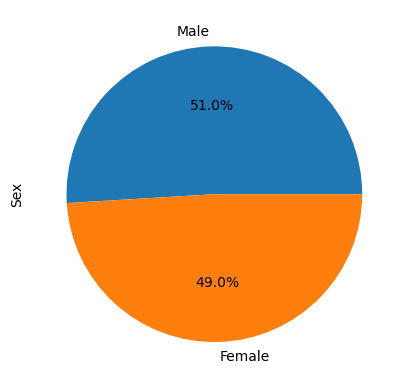

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_data['Sex'].value_counts()
mice_gender.plot.pie(autopct="%1.1f%%")
plt.show()

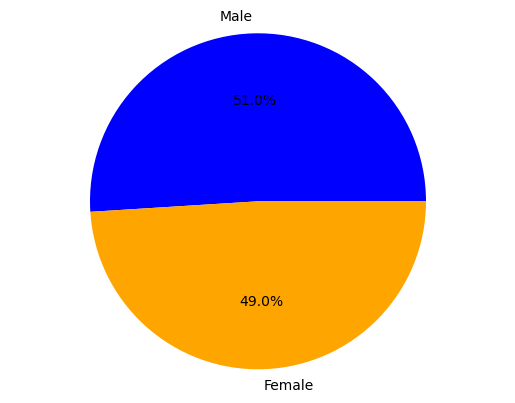

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
percents = [51.0, 49.0]
labels = ['Male', 'Female']
colors = ['Blue', 'Orange']
plt.pie(percents, labels=labels, colors=colors, autopct="%1.1f%%" )
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin',:]
Ramicane_data = clean_data.loc[clean_data['Drug Regimen'] == 'Ramicane',:]
Infubinol_data = clean_data.loc[clean_data['Drug Regimen'] == 'Infubinol',:]
Ceftamin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Ceftamin',:]
# Start by getting the last (greatest) timepoint for each mouse
drugs = [Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data]
treatment_table = pd.concat(drugs) 
#Git hub link in ReadME helped create this code




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = clean_data["Timepoint"].max()

merged_frames = pd.merge(treatment_table,last_timepoint, on="Mouse ID")
merged_frames["MaxTime"] = merged_frames["Timepoint_x"] == merged_frames["Timepoint_y"]

merged_frames.drop(merged_frames.loc[merged_frames['MaxTime']==False].index, inplace=True)

tumor_table = merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
tumor_table 

TypeError: Can only merge Series or DataFrame objects, a <class 'int'> was passed

In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treament_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treament_list:
    tumor_vol = tumor_table.loc[tumor_table['Drug Regimen']==x]['Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_vol)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    
    # add subset 
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > upper_bound) | (tumor_vol < lower_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")
    
    # Determine outliers using upper and lower bounds


NameError: name 'tumor_table' is not defined

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = drugs)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

NameError: name 'tumor_vol' is not defined

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

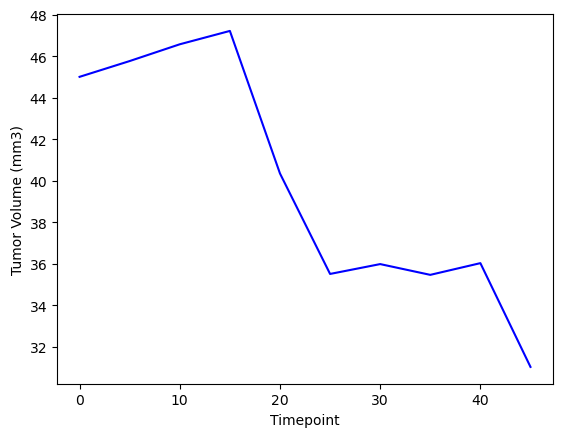

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_364 = Capomulin_data.loc[Capomulin_data['Mouse ID']=="u364"]

x_value = mouse_364['Timepoint']
y_value = mouse_364['Tumor Volume (mm3)']

plt.plot(x_value, y_value, color = 'blue', label = 'Mouse ID u364')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

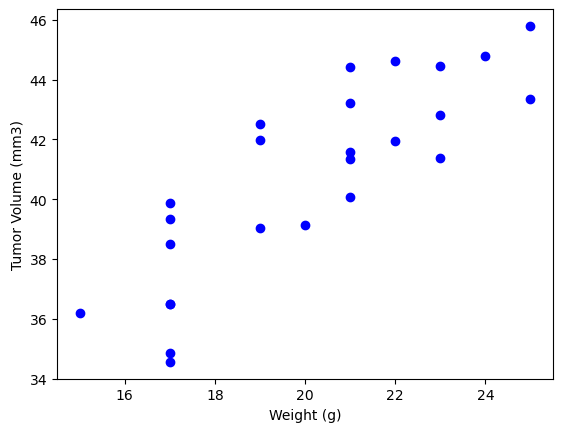

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = Capomulin_data.groupby("Mouse ID")
mice_weight = capomulin_mice["Weight (g)"].mean()
mice_tumor_vol = capomulin_mice['Tumor Volume (mm3)'].mean()

x_value = mice_weight
y_value = mice_tumor_vol

plt.scatter(x_value, y_value, marker='o', facecolors = 'blue')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


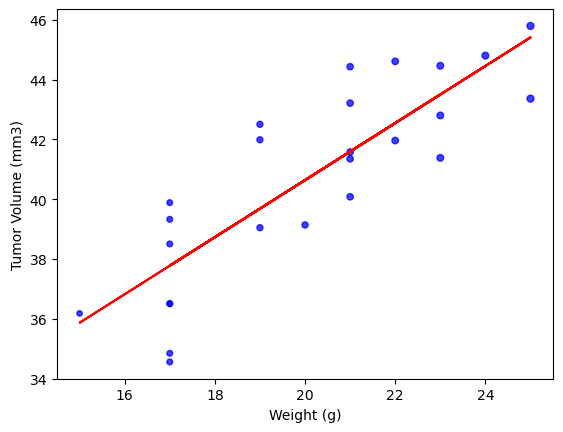

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_value = mice_weight
y_value = mice_tumor_vol

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker="o", facecolors="blue", s=x_value, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=8,color="red")

print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_value,y_value)[0],2)}")